# Experiment's Exploratory Data Analisys

Explores the results of the experiments.

In [1]:
% matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from pymongo import MongoClient

db = MongoClient().imdbws
df = pd.DataFrame(list(db.exp_0.find())).set_index('_id')
df = df.drop(['title', 'ypct_rating', 'ypct_votes'], axis=1)

List of all features ordered by correlation to `ypct`:

In [2]:
c = df[df.columns.drop(labels=['top100', 'year'])].corr(method='spearman')['ypct']
order = c.abs().sort_values(ascending = False).index
print(c[order].to_string())

ypct                                 1.000000
ego_previous_votes_maximum           0.723964
ego_previous_votes_mean              0.718632
ego_previous_votes_median            0.717715
team_previous_votes                  0.697665
ego_previous_votes_minimum           0.594149
ego_previous_rating_std_dev          0.507660
team_closeness                       0.401436
team_size                            0.390004
ego_closeness_maximum                0.386651
ego_closeness_minimum                0.376750
ego_closeness_mean                   0.371193
ego_closeness_median                 0.352886
ego_network_constraint_mean         -0.341547
pair_shared_collaborators_maximum    0.327526
pair_shared_collaborators_mean       0.322055
ego_network_constraint_median       -0.320948
pair_shared_collaborators_minimum    0.320883
pair_neighbour_overlap_std_dev       0.315264
pair_shared_collaborators_median     0.313365
pair_neighbour_overlap_maximum       0.312440
team_network_constraint           

## Previous Votes

Scatter plot of `previous_votes` features and `ypct`:

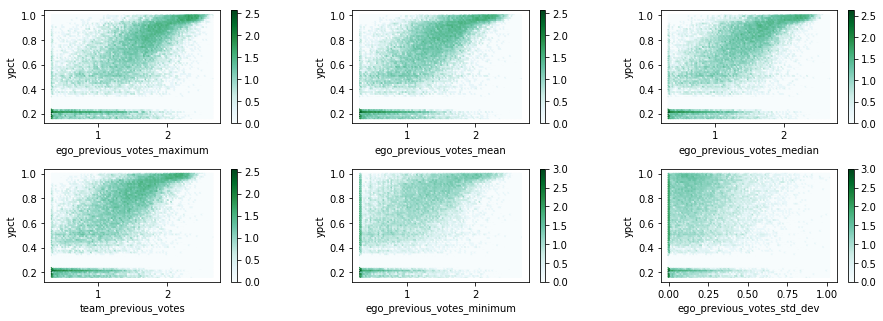

In [3]:
f = ['ego_previous_votes_maximum',
'ego_previous_votes_mean',
'ego_previous_votes_median',
'team_previous_votes',
'ego_previous_votes_minimum',
'ego_previous_votes_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')    

Plot with boxplots of `ego_previous_votes_maximum` every year:

In [4]:
dfx[f[:-2]].corr()

,ego_previous_votes_maximum,ego_previous_votes_mean,ego_previous_votes_median,team_previous_votes,ego_previous_votes_minimum,ego_previous_votes_std_dev
ego_previous_votes_maximum,1.000000,0.940142,0.927849,0.911602,0.737264,0.385349
ego_previous_votes_mean,0.940142,1.000000,0.989209,0.963606,0.912088,0.064973
ego_previous_votes_median,0.927849,0.989209,1.000000,0.955378,0.877532,0.092214
team_previous_votes,0.911602,0.963606,0.955378,1.000000,0.870154,0.085547
ego_previous_votes_minimum,0.737264,0.912088,0.877532,0.870154,1.000000,-0.326963
ego_previous_votes_std_dev,0.385349,0.064973,0.092214,0.085547,-0.326963,1.000000


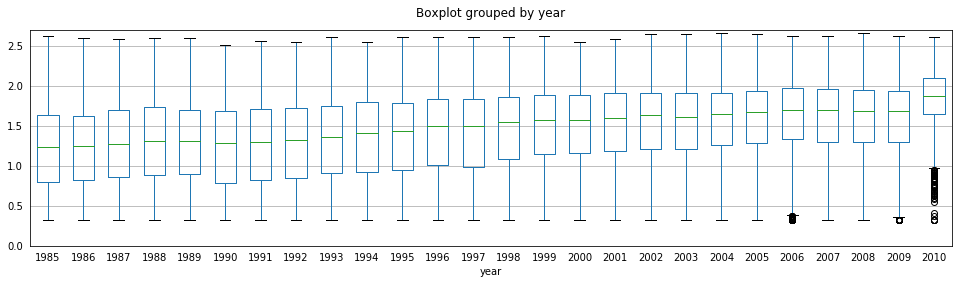

In [5]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('ego_previous_votes_maximum', by='year', figsize=(16,4), widths=0.6)
ax.set_ylim(0, 2.7)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.xaxis.grid(False)

## Previous Ratings

Scatter plot of `previous_ratings` features and `ypct`:

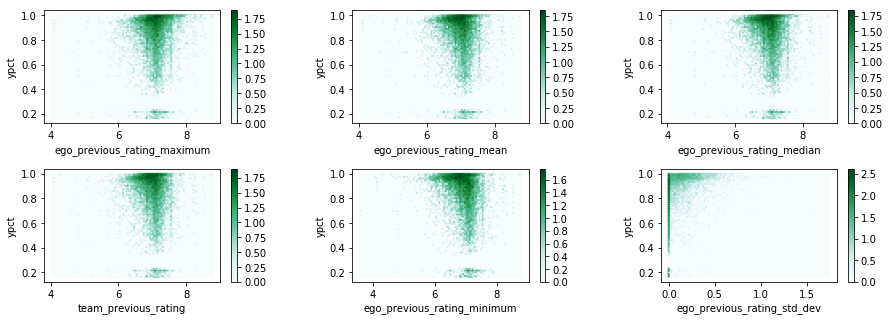

In [6]:
f = ['ego_previous_rating_maximum',
'ego_previous_rating_mean',
'ego_previous_rating_median',
'team_previous_rating',
'ego_previous_rating_minimum',
'ego_previous_rating_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')    

In [7]:
dfx[f[:-2]].corr()

,ego_previous_rating_maximum,ego_previous_rating_mean,ego_previous_rating_median,team_previous_rating,ego_previous_rating_minimum,ego_previous_rating_std_dev
ego_previous_rating_maximum,1.000000,0.896850,0.874939,0.877517,0.665330,0.287743
ego_previous_rating_mean,0.896850,1.000000,0.988856,0.974865,0.916813,-0.147065
ego_previous_rating_median,0.874939,0.988856,1.000000,0.965358,0.893106,-0.142070
team_previous_rating,0.877517,0.974865,0.965358,1.000000,0.889046,-0.132497
ego_previous_rating_minimum,0.665330,0.916813,0.893106,0.889046,1.000000,-0.513503
ego_previous_rating_std_dev,0.287743,-0.147065,-0.142070,-0.132497,-0.513503,1.000000


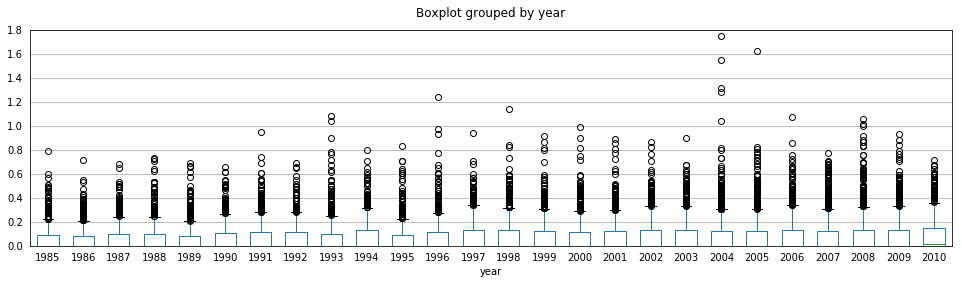

In [8]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('ego_previous_rating_std_dev', by='year', figsize=(16,4), widths=0.6)
ax.set_ylim(0, 1.8)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.xaxis.grid(False)

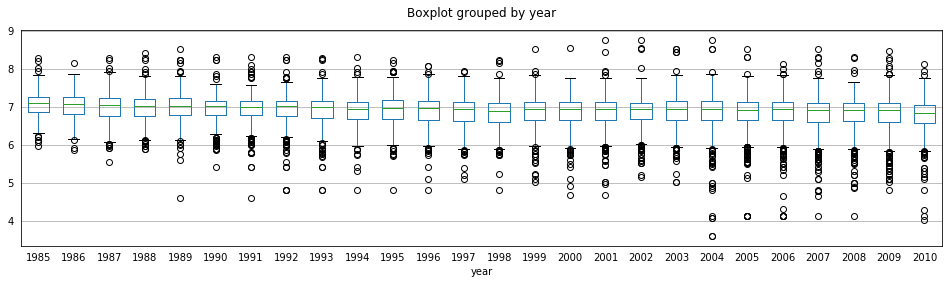

In [9]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('ego_previous_rating_minimum', by='year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.xaxis.grid(False)

## Closeness

Scatter plot of `closeness` features and `ypct`:

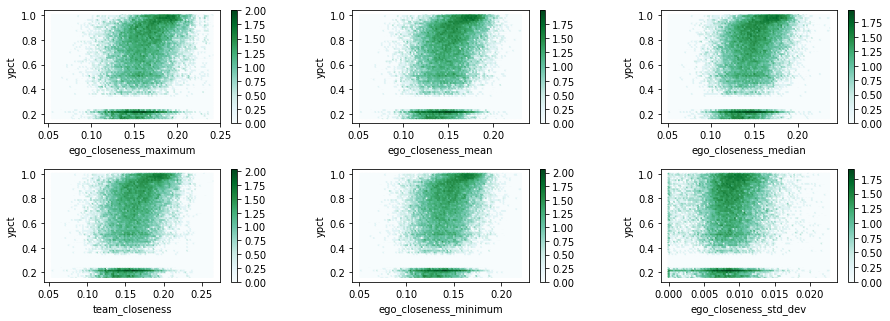

In [10]:
f = ['ego_closeness_maximum',
'ego_closeness_mean',
'ego_closeness_median',
'team_closeness',
'ego_closeness_minimum',
'ego_closeness_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')    

In [11]:
dfx[f[:-2]].corr()

,ego_closeness_maximum,ego_closeness_mean,ego_closeness_median,team_closeness,ego_closeness_minimum,ego_closeness_std_dev
ego_closeness_maximum,1.000000,0.980223,0.945096,0.995802,0.967467,0.627850
ego_closeness_mean,0.980223,1.000000,0.987206,0.984578,0.989264,0.514343
ego_closeness_median,0.945096,0.987206,1.000000,0.954470,0.968203,0.458470
team_closeness,0.995802,0.984578,0.954470,1.000000,0.973379,0.588500
ego_closeness_minimum,0.967467,0.989264,0.968203,0.973379,1.000000,0.427752
ego_closeness_std_dev,0.627850,0.514343,0.458470,0.588500,0.427752,1.000000


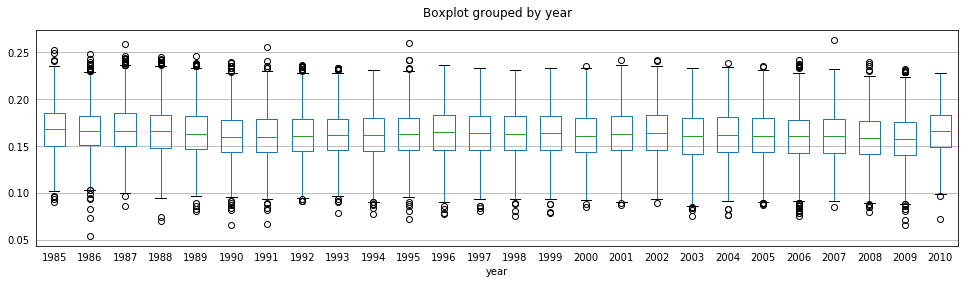

In [12]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('team_closeness', by='year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.xaxis.grid(False)

## Team Size

Scatter plot of `team_size` and `ypct`:

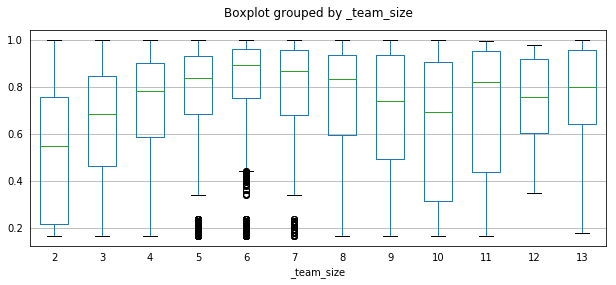

In [13]:
df['_team_size'] = df.team_size.map(lambda x: x if x < 13 else 13)
ax = df.boxplot('ypct', by='_team_size', figsize=(10,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.xaxis.grid(False)

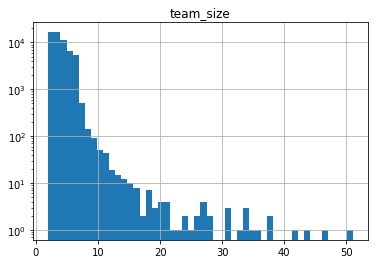

In [21]:
ax = df.hist('team_size', log=True, bins=50)